In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
data=pd.read_csv("salary_data.csv")
#print(data)
'''plt.scatter(data['YearsExperience'],data['Salary'])
plt.show()'''
xtrain,xtest,ytrain,ytest=train_test_split(data['YearsExperience'],
                                           data['Salary'],test_size=0.3)

In [11]:
model_lr=LinearRegression()
model_lr.fit(xtrain.values.reshape(-1,1),ytrain)

LinearRegression()

In [14]:
pred_train=model_lr.predict(xtrain.values.reshape(-1,1))
pred_test=model_lr.predict(xtest.values.reshape(-1,1))
print(r2_score(ytrain,pred_train),r2_score(ytest,pred_test))

0.9625811166240054 0.9290479117954591


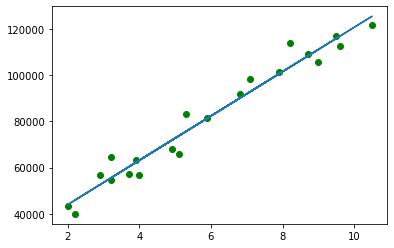

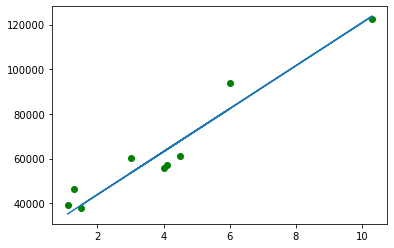

In [16]:
plt.scatter(xtrain,ytrain,color='green')
plt.plot(xtrain,pred_train)
plt.show()
plt.scatter(xtest,ytest,color='green')
plt.plot(xtest,pred_test)
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
data=pd.read_csv("position_salaries.csv")
'''plt.scatter(data['Level'],data['Salary'])
plt.show()'''
lr=LinearRegression()
lr.fit(data['Level'].values.reshape(-1,1),data['Salary'])
print(r2_score(data['Salary'],lr.predict(data['Level'].values.reshape(-1,1))))

0.6690412331929895


In [28]:
poly=PolynomialFeatures(degree=4)
poly_data=poly.fit_transform(data['Level'].values.reshape(-1,1))
lr=LinearRegression()
lr.fit(poly_data,data['Salary'])
print(r2_score(data['Salary'],lr.predict(poly_data)))

0.9973922891706614


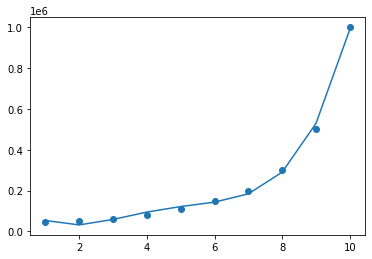

In [29]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],lr.predict(poly_data))
plt.show()

In [49]:
data=pd.read_csv("auto-mpg.data",sep="\s+",na_values="?",header=None)
#print(data.isna().sum())
from sklearn.impute import SimpleImputer
data_i=pd.DataFrame(SimpleImputer().fit_transform(data[[0,1,2,3,4,5,6]]))
#print(data_i.isna().sum().sum())
from sklearn.preprocessing import LabelEncoder
data[8]=LabelEncoder().fit_transform(data[8])
#print(data)
data[[0,1,2,3,4,5,6]]=data_i
#print(data.head())
xtrain,xtest,ytrain,ytest=train_test_split(data.drop(columns=[8]),data[8])
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)
model.fit(xtrain,ytrain)
print(r2_score(ytrain,model.predict(xtrain)))
print(r2_score(ytest,model.predict(xtest)))


0.35110025743790296
0.04202948595952816


In [55]:
df=pd.read_csv("tips.csv")
#print(df)
X=df['total_bill']
Y=df['tip']
from sklearn.linear_model import RANSACRegressor
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [56]:
ran_reg=RANSACRegressor(LinearRegression())
ran_reg.fit(xtrain.values.reshape(-1,1),ytrain)

RANSACRegressor(base_estimator=LinearRegression())

In [59]:
inliers=ran_reg.inlier_mask_
outliers=np.logical_not(inliers)

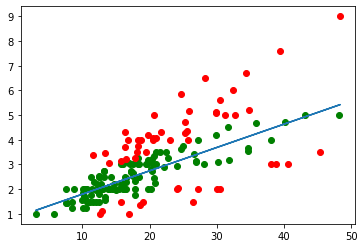

In [67]:
plt.scatter(xtrain.values.reshape(-1,1)[inliers],ytrain[inliers],color="green")
plt.scatter(xtrain.values.reshape(-1,1)[outliers],ytrain[outliers],color="red")
plt.plot(xtrain,ran_reg.predict(xtrain.values.reshape(-1,1)))
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
data=load_boston()

In [3]:
X=pd.DataFrame(data.data, columns=data.feature_names)
Y=data.target
print(X.isna().sum().sum())

0


<AxesSubplot:>

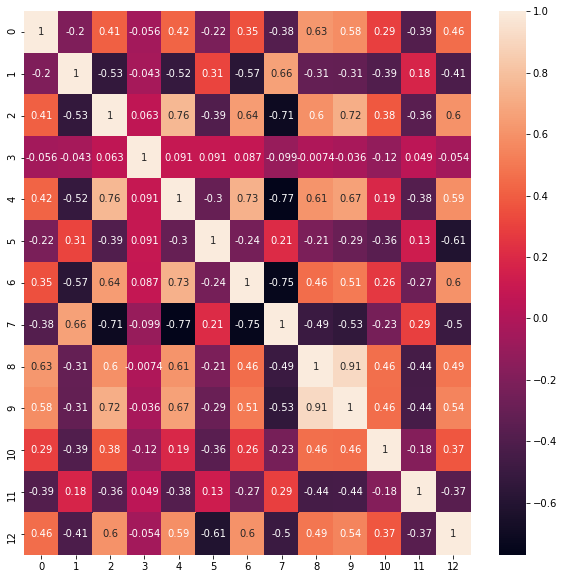

In [5]:
from sklearn.preprocessing import StandardScaler
X=pd.DataFrame(StandardScaler().fit_transform(X))
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

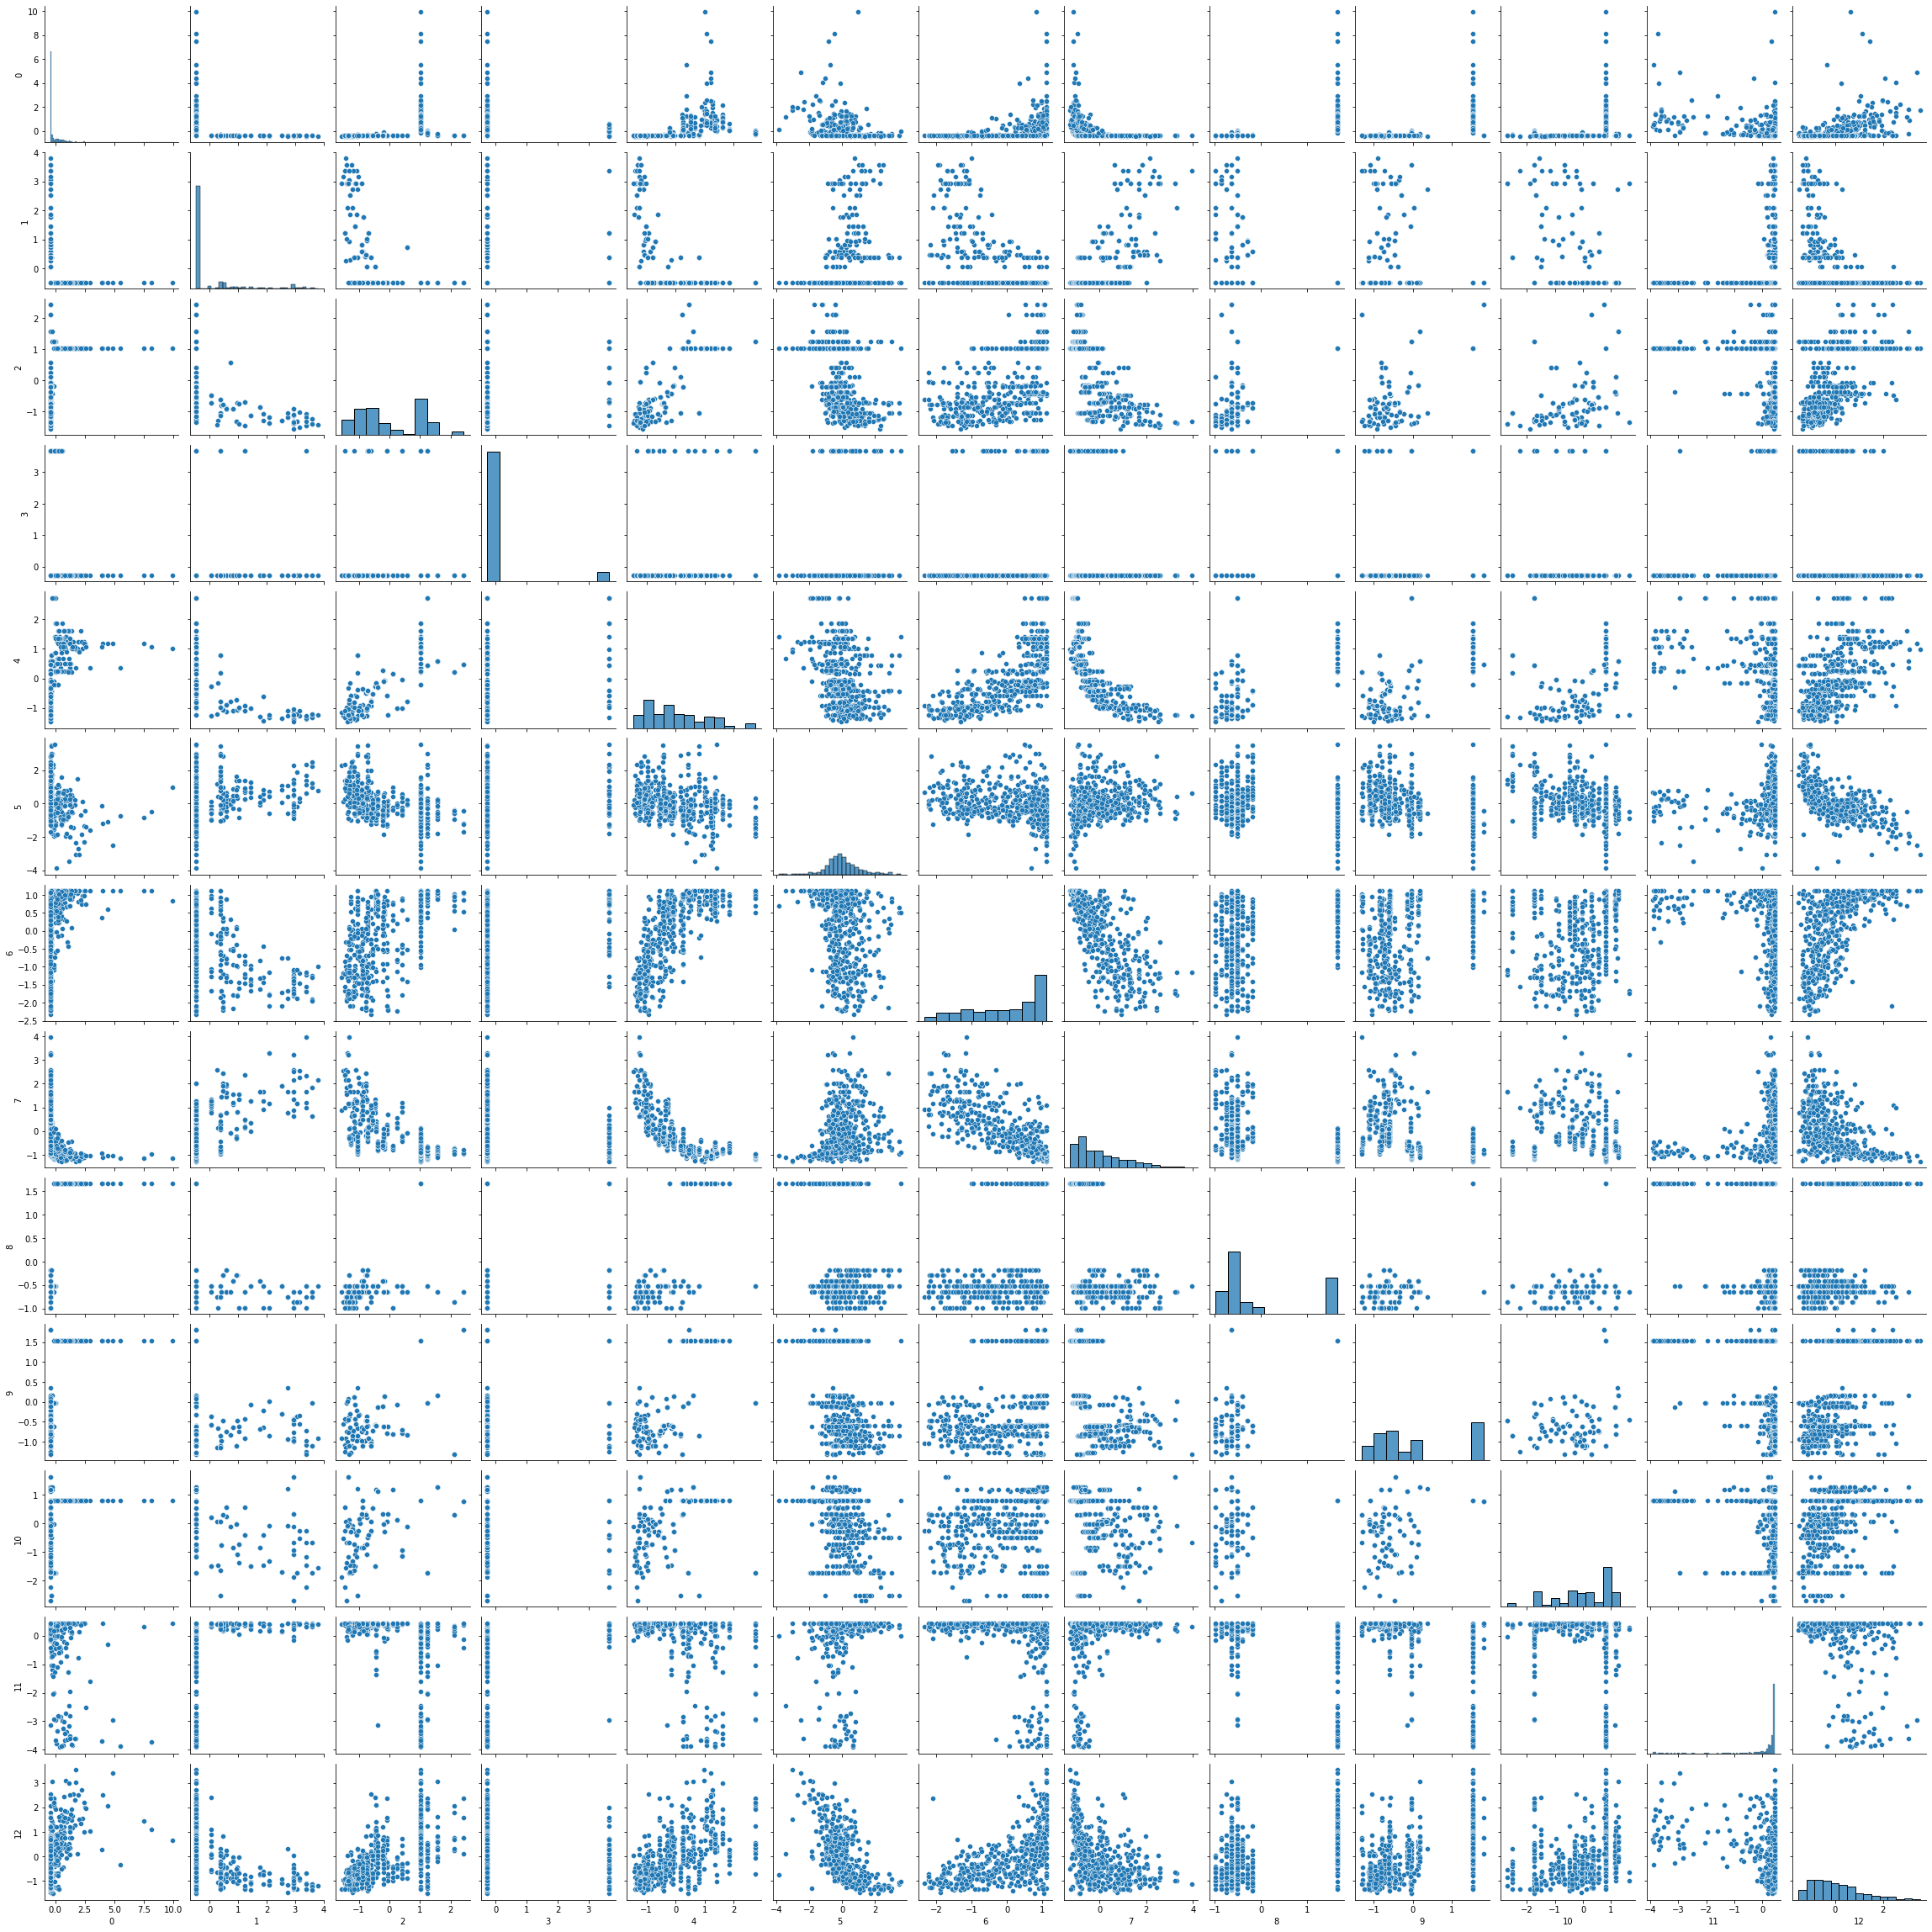

In [8]:

sns.pairplot(X)

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)
from sklearn.linear_model import Lasso
model=Lasso(alpha=0.1)
model.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [23]:
from sklearn.metrics import r2_score
print(r2_score(ytrain, model.predict(xtrain)))
print(r2_score(ytest,model.predict(xtest)))

0.7541927747425163
0.6319801667435789


[-0.58461888  0.46528428 -0.          0.70725322 -1.20183837  3.55147953
 -0.05446821 -1.99933144  0.69307568 -0.56275559 -2.01209224  0.88796509
 -3.22151465]


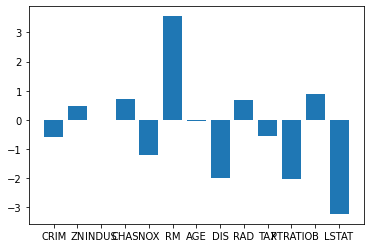

In [24]:
print(model.coef_)
plt.bar(data.feature_names,model.coef_)
plt.show()

In [26]:
from sklearn.linear_model import Ridge, ElasticNet
model_r=Ridge(alpha=0.1)
model_en=ElasticNet(alpha=0.1)

In [27]:
model_r.fit(xtrain,ytrain)
model_en.fit(xtrain,ytrain)

ElasticNet(alpha=0.1)

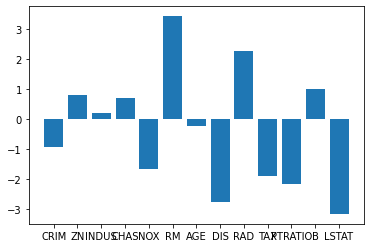

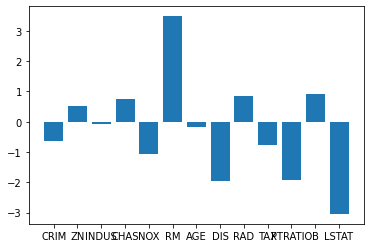

In [29]:
plt.bar(data.feature_names, model_r.coef_)
plt.show()
plt.bar(data.feature_names,model_en.coef_)
plt.show()